### Cristian Adolfo Baquero Pico 
2021

# **Desgaste y rendimiento de empleados de IBM HR Analytics**

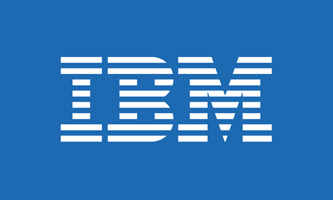

Predecir el desgaste de sus empleados más valiosos

# **1. Entendimiento del negocio**

## **Objetivos de negocio**

La deserción es un problema que afecta a todas las empresas, independientemente de la geografía, la industria y el tamaño de la empresa. La deserción de empleados genera costos significativos para una empresa, incluido el costo de la interrupción del negocio, la contratación de nuevo personal y la capacitación de nuevo personal. Como tal, existe un gran interés empresarial en comprender los factores que impulsan y minimizar el desgaste del personal.

Este conjunto de datos presenta una encuesta de empleados de IBM, que indica si hay deserción o no. El conjunto de datos contiene aproximadamente 1500 entradas.

## **Metas del Proyecto de machine learning**

Predecir el desgaste de los empleados más valiosos. Descubrir los factores que conducen al desgaste de los empleados y explorar cuestiones importantes como "La relación entre la distancia de la casa al trabajo por puesto de trabajo y el desgaste" o "La relación entre el ingreso mensual promedio por educación y desgaste". Este es un conjunto de datos ficticios creado por científicos de datos de IBM

# **2. Entendimiento de los datos**

## Importación de librerías

In [174]:
!pip install -U plotly
!pip install seaborn --upgrade
!pip install -U scikit-learn

In [175]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [176]:
# Configuraciones de Matplotlib
%matplotlib inline   
plt.rcParams['figure.dpi'] = 80  

# Estilo por defecto para notebooks.
sns.set_theme('notebook')

## **Recolección inicial de datos**

In [177]:
!wget -q --no-check-certificate 'https://drive.google.com/uc?id=164xzDVHC0mNORc8bZCdvQb24HLy_ypUr&export=download' -O IBM_data.csv  

In [178]:
df_ibm = pd.read_csv('IBM_data.csv')

In [179]:
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **Descripción de los datos**

In [180]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [181]:
df_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [182]:
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [183]:
cols_categoric = ['Attrition', 'BusinessTravel', 'Department', 'Education', 
                  'EducationField', 'EnvironmentSatisfaction', 'Gender', 
                  'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                  'MaritalStatus', 'OverTime', 'PerformanceRating',
                  'RelationshipSatisfaction', 'StockOptionLevel', 
                  'WorkLifeBalance']

cols_numeric = ['Age', 'DailyRate', 'DistanceFromHome',
                'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                'NumCompaniesWorked', 'PercentSalaryHike', 
                'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

useless_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']

#'EmployeeCount' y 'EmployeeNumber' no sirven, puede que 'Over18', 'StandardHours' tampoco

## **Exploración de los datos**

In [184]:
df_ibm.mean()

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

In [185]:
df_ibm.median()

Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

In [186]:
for col in df_ibm.columns:
  print('Moda de "'+str(col)+'": ' + str(list(df_ibm[col].mode())))

Moda de "Age": [35]
Moda de "Attrition": ['No']
Moda de "BusinessTravel": ['Travel_Rarely']
Moda de "DailyRate": [691]
Moda de "Department": ['Research & Development']
Moda de "DistanceFromHome": [2]
Moda de "Education": [3]
Moda de "EducationField": ['Life Sciences']
Moda de "EmployeeCount": [1]
Moda de "EmployeeNumber": [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 45, 46, 47, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 90, 91, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 110, 112, 113, 116, 117, 118, 119, 120, 121, 124, 125, 126, 128, 129, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 174, 175, 176, 177, 178, 179, 182, 183, 184, 190, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 20

In [187]:
print("***** Evaluamos Curtosis (Apuntamiento) *****\n")
lista_curtosis = pd.DataFrame(columns=['columna', 'tipo', 'Curtosis'], index=range(df_ibm.columns.size))
i = 0
for col in df_ibm.columns:
  if df_ibm[col].dtype != 'object':
    kurt = df_ibm[col].kurt()
    if kurt >= -0.2 and kurt <= 0.2:
      lista_curtosis.iloc[i] = (col, 'Mesocúrtica ("Normal")', kurt)
    elif kurt < -0.2:
      lista_curtosis.iloc[i] = (col, 'Platicúrtica ("Aplanada")', kurt)
    else:
      lista_curtosis.iloc[i] = (col, 'Leptocúrtica ("Con Punta")', kurt)
  i = i + 1

lista_curtosis.dropna()

***** Evaluamos Curtosis (Apuntamiento) *****



,columna,tipo,Curtosis
0,Age,"Platicúrtica (""Aplanada"")",-0.404145
3,DailyRate,"Platicúrtica (""Aplanada"")",-1.20382
5,DistanceFromHome,"Platicúrtica (""Aplanada"")",-0.224833
6,Education,"Platicúrtica (""Aplanada"")",-0.559115
8,EmployeeCount,"Mesocúrtica (""Normal"")",0
9,EmployeeNumber,"Platicúrtica (""Aplanada"")",-1.22318
10,EnvironmentSatisfaction,"Platicúrtica (""Aplanada"")",-1.20252
12,HourlyRate,"Platicúrtica (""Aplanada"")",-1.1964
13,JobInvolvement,"Leptocúrtica (""Con Punta"")",0.270999
14,JobLevel,"Leptocúrtica (""Con Punta"")",0.399152


In [188]:
print("***** Evaluamos Asimetría (skewness) *****\n")
lista_skewness = pd.DataFrame(columns=['columna', 'tipo', 'skewness'], index=range(df_ibm.columns.size))
i = 0
for col in df_ibm.columns:
  if df_ibm[col].dtype != 'object':
    skew = df_ibm[col].skew()
    if skew >= -0.2 and skew <= 0.2:
      lista_skewness.iloc[i] = (col, 'Distribución Normal', skew)
    elif skew < -0.2:
      lista_skewness.iloc[i] = (col, 'Sesgo a la Derecha', skew)
    else:
      lista_skewness.iloc[i] = (col, 'Sesgo a la Izquierda', skew)
  i = i + 1

lista_skewness.dropna()

***** Evaluamos Asimetría (skewness) *****



,columna,tipo,skewness
0,Age,Sesgo a la Izquierda,0.413286
3,DailyRate,Distribución Normal,-0.00351857
5,DistanceFromHome,Sesgo a la Izquierda,0.958118
6,Education,Sesgo a la Derecha,-0.289681
8,EmployeeCount,Distribución Normal,0
9,EmployeeNumber,Distribución Normal,0.016574
10,EnvironmentSatisfaction,Sesgo a la Derecha,-0.321654
12,HourlyRate,Distribución Normal,-0.032311
13,JobInvolvement,Sesgo a la Derecha,-0.498419
14,JobLevel,Sesgo a la Izquierda,1.0254


In [189]:
px.imshow(abs(df_ibm.drop(columns=useless_cols).corr()), width=800, height=800)

## **Verificación de la calidad de los datos**

Visualización de datos estadísticos

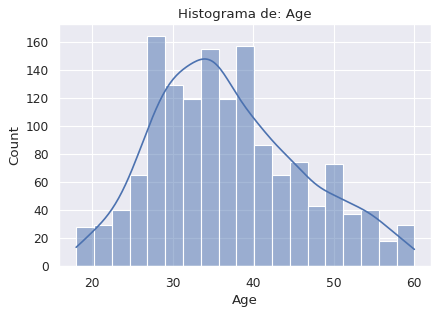

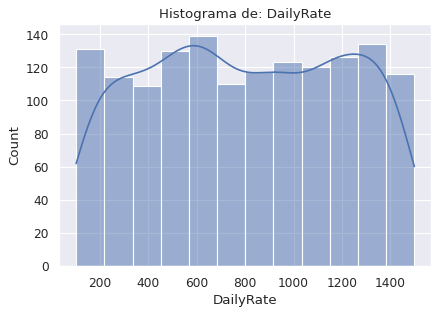

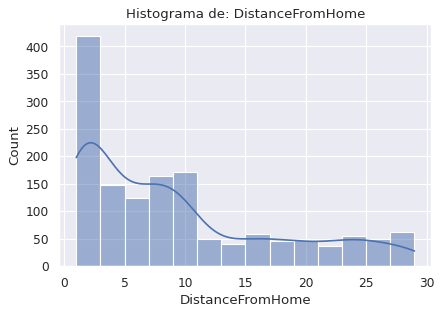

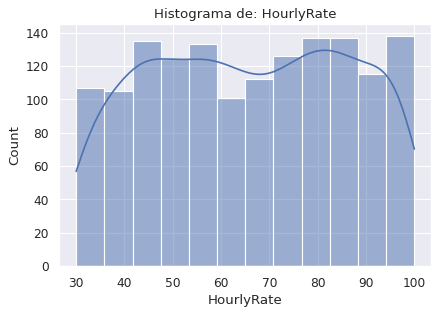

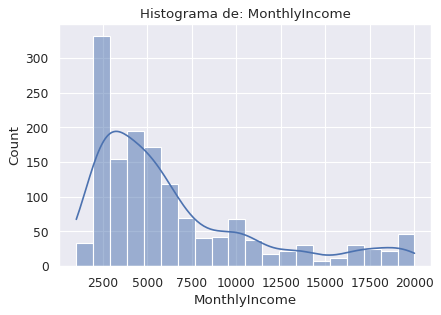

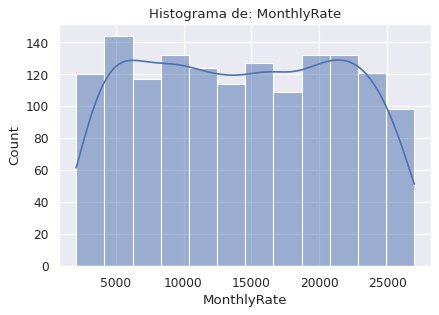

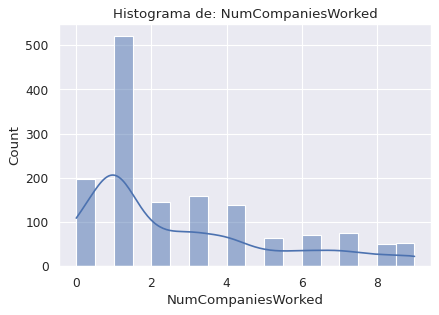

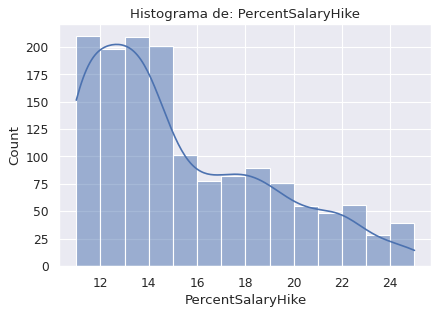

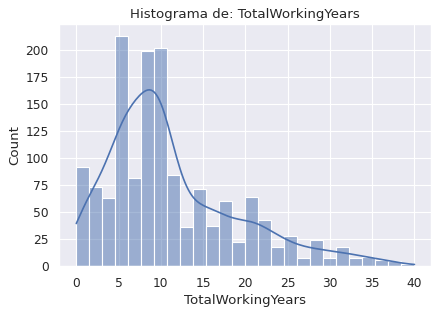

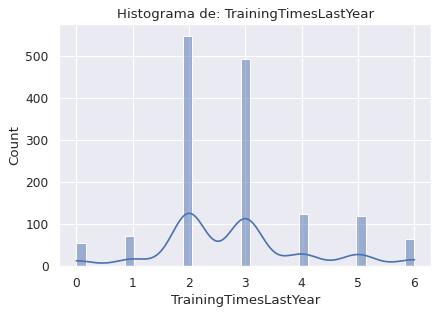

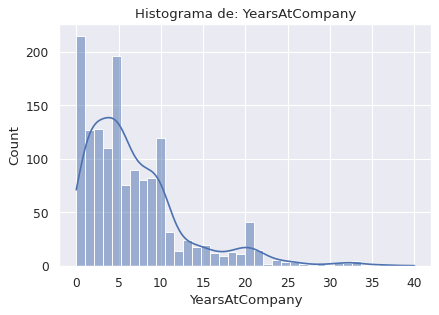

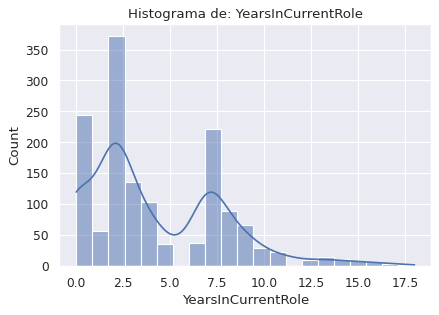

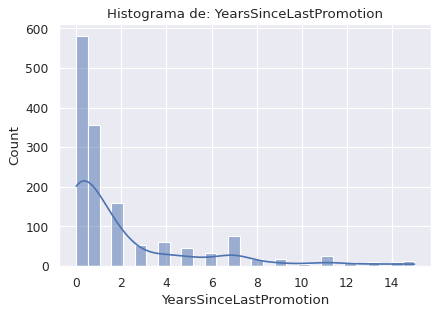

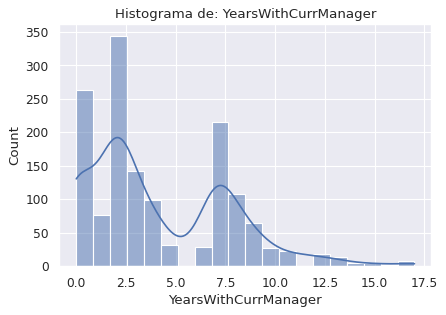

In [190]:
for col in cols_numeric:
  fig, ax = plt.subplots()
  ax.set_title('Histograma de: ' + str(col))
  sns.histplot(ax=ax, data=df_ibm[col], kde=True);

In [191]:
fig = make_subplots(rows=5, cols=3, subplot_titles=(cols_numeric))
k=0
for i in range(1,6):
  for j in range(1,4):
    if i == 5 and j == 3:
      break
    fig.add_trace(go.Box(y=df_ibm[cols_numeric[k]]),row=i, col=j)
    k=k+1

fig.update_layout(height=2500, width=1000, title_text="Boxplot")
fig.show()

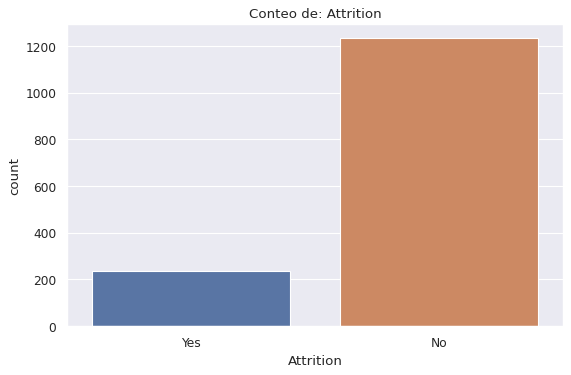

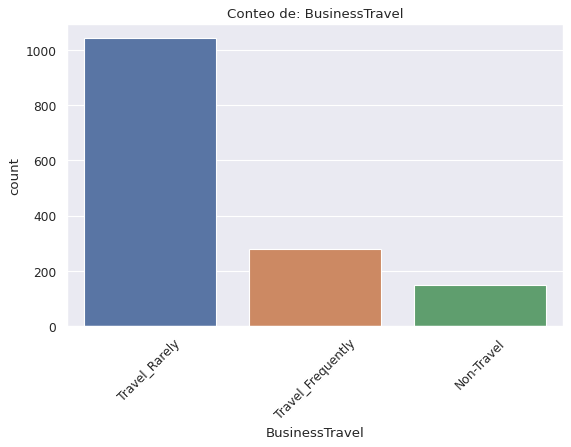

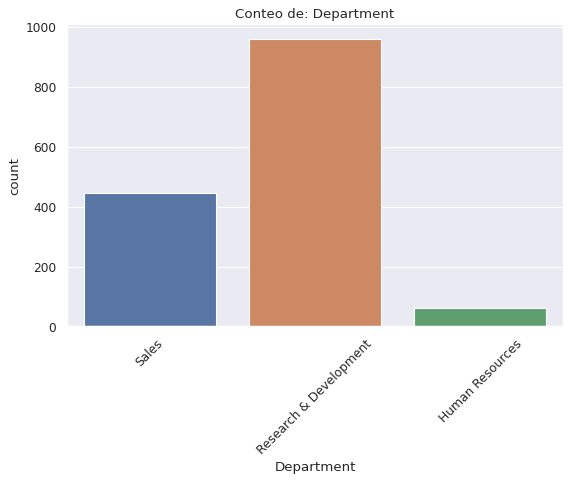

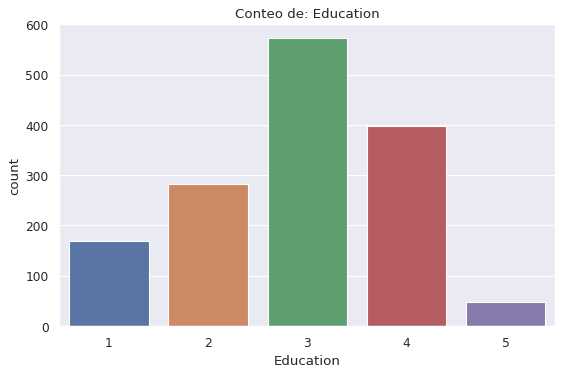

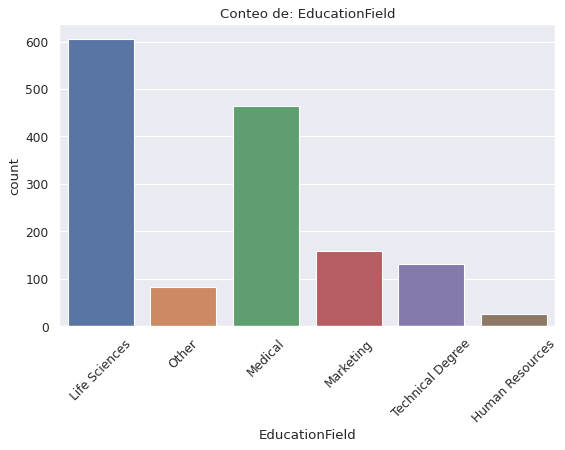

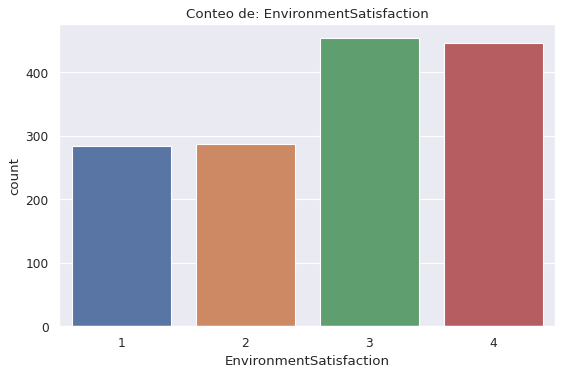

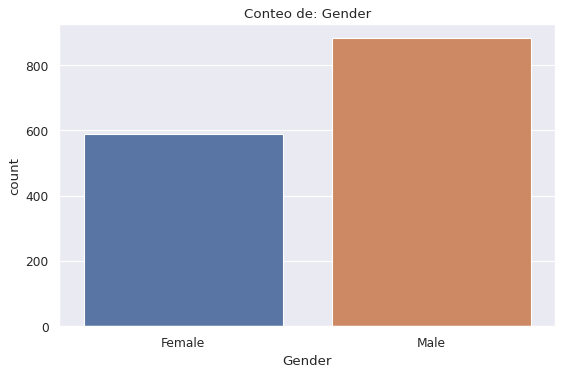

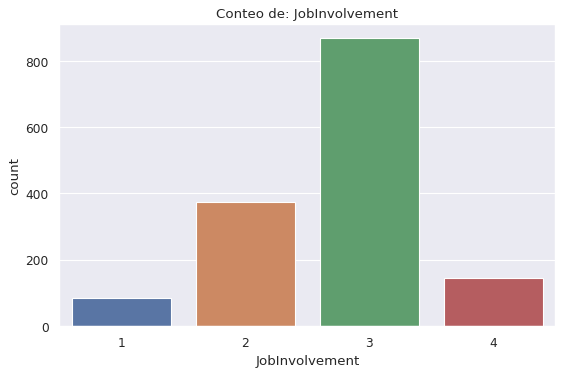

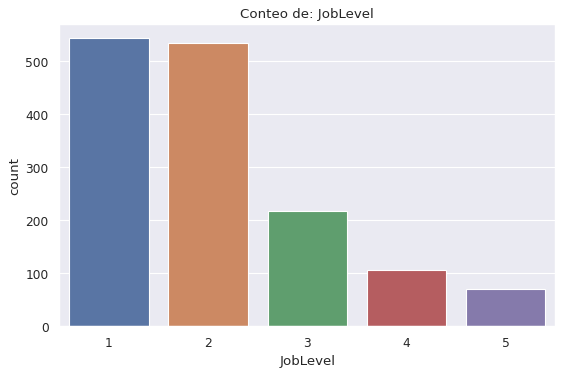

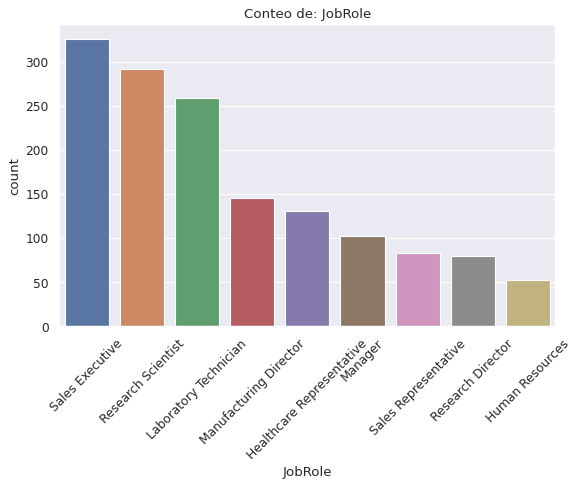

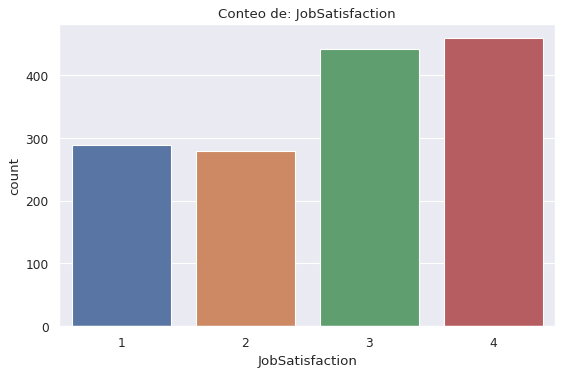

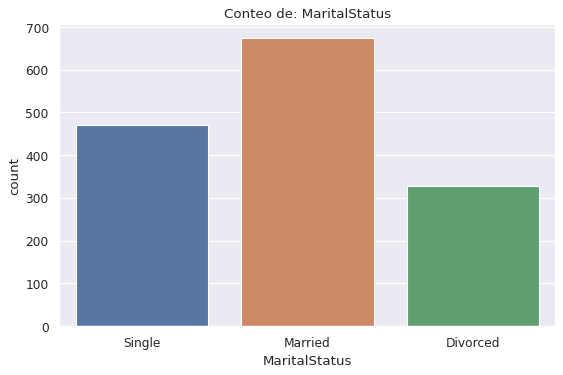

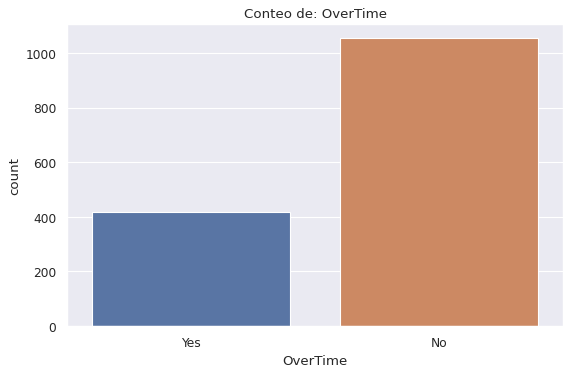

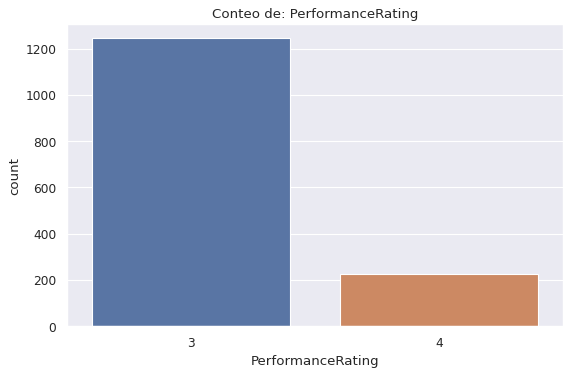

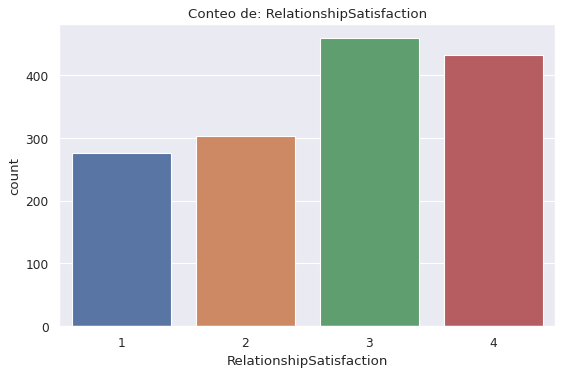

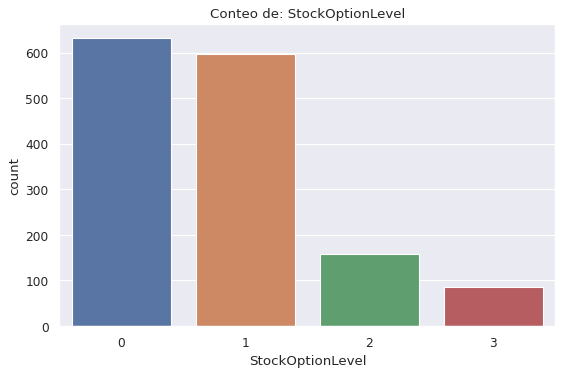

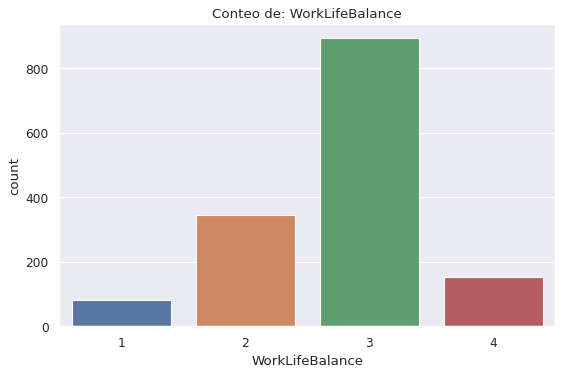

In [192]:
for col in cols_categoric:
  fig, ax = plt.subplots(figsize=(8, 5))
  ax.set_title('Conteo de: ' + str(col))
  sns.countplot(ax=ax, x=col, data=df_ibm);
  if col in ['BusinessTravel', 'Department', 'EducationField', 'JobRole']:
    plt.xticks(rotation=45)

# **3. Preparación de los datos**

## **Selección de Datos finales y Limpieza de los datos**

In [193]:
# Borramos las columnas innecesarias
df_ibm.drop(columns=useless_cols, inplace=True)

In [194]:
df_ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [195]:
X = df_ibm.drop(['Attrition'], axis=1)
y = df_ibm['Attrition']

In [196]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [197]:
# Eliminamos el label de la lista de columnas categoricas
cols_categoric.remove('Attrition')

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, stratify=y)   # Estratificar con respecto a la etiqueta.

In [199]:
print('I. Partición de entrenamiento:\n')

print(f"Tamaño de X: {X_train.shape}")
print(f"Valores únicos de y:\n", y_train.value_counts())

print('\nII. Partición de prueba:\n')
print(f"Tamaño de X: {X_test.shape}")
print(f"Valores únicos de y:\n", y_test.value_counts())

I. Partición de entrenamiento:

Tamaño de X: (1029, 30)
Valores únicos de y:
 No     863
Yes    166
Name: Attrition, dtype: int64

II. Partición de prueba:

Tamaño de X: (441, 30)
Valores únicos de y:
 No     370
Yes     71
Name: Attrition, dtype: int64


**Preprocesamiento**

In [200]:
X_categoric = X_train[cols_categoric].values
X_numeric = X_train[cols_numeric].values

In [201]:
# Hacemos escalamiento estandar a las variables numéricas

scaler = StandardScaler()  # Declaramos el Transformer "StandardScaler"
X_numeric_standarized = scaler.fit_transform(X_numeric) # Transformamos la matriz "X_numeric"
X_numeric_standarized.shape

(1029, 14)

In [202]:
# Hacemos preprocesamiento a las variables categoricas

encoder = OneHotEncoder(sparse=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = encoder.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot.shape)

(1029, 64)


In [203]:
X_full_train = np.concatenate((X_numeric_standarized, X_categoric_onehot),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full_train.shape)

(1029, 78)


In [204]:
names_out_cols_categoric = encoder.get_feature_names_out(cols_categoric)

In [205]:
new_cols_names = np.concatenate((cols_numeric, names_out_cols_categoric), axis=None)

In [206]:
X_full_train_df = pd.DataFrame(data=X_full_train, columns=new_cols_names)
X_full_train_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,-0.857037,0.462557,-0.997552,0.944371,-0.929740,0.740895,-1.087111,-0.308526,-0.561882,-1.404331,-0.150316,-0.616999,-0.367047,0.255689,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.105273,-0.232041,-0.146508,0.049200,-0.466657,-0.075811,0.490657,0.776853,1.011745,0.140358,-0.842378,-0.616999,-0.045881,-0.603193,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.527891,0.365463,-0.511241,-0.050263,-0.790752,0.448492,-0.298227,-0.308526,0.093796,0.140358,0.022699,0.780210,-0.688213,0.828278,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.308461,1.356322,-0.997552,-1.044898,-0.208266,-0.206501,2.462866,0.505508,-0.299611,0.140358,-0.842378,-0.616999,-0.045881,-0.889487,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.130400,0.995330,-0.024930,0.248127,-0.358415,-0.026118,-0.298227,1.048197,-0.168476,-2.176675,-0.323332,-0.616999,-0.688213,-0.316899,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,0.020685,0.960476,-0.511241,-0.249190,-0.026529,1.220979,1.673982,0.234163,-0.430747,-0.631986,-0.150316,-0.616999,-0.688213,-0.030605,0.0,0.0,1.0,0.

Balanceamos las etiquetas

In [207]:
X_full_train[y_train == 'No'].shape

(863, 78)

In [208]:
X_full_train[y_train == 'Yes'].shape

(166, 78)

In [209]:
# Hacemos agrupamiento para obtener 166 centros representativos de los datos
km = KMeans(n_clusters = 166)
km.fit(X_full_train[y_train == 'No'])

KMeans_data = km.predict(X_full_train[y_train == 'No'])

In [210]:
km.cluster_centers_

array([[ 1.72127022, -0.82954366, -0.57202966, ...,  0.5       ,
         0.5       ,  0.        ],
       [ 0.05203208,  0.90677196, -0.45913606, ...,  0.21428571,
         0.64285714,  0.14285714],
       [-0.51417663, -0.36212195, -0.78479066, ...,  0.625     ,
         0.375     ,  0.        ],
       ...,
       [ 1.61155503,  1.32271238, -0.02492993, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.38640216,  0.568503  , -0.61930988, ...,  0.44444444,
         0.55555556,  0.        ],
       [ 0.45954561,  0.42936222,  0.38032913, ...,  0.        ,
         1.        ,  0.        ]])

In [211]:
# Como los centros no son datos "reales" obtenemos el sample más cercano a cada centro
X_label_No = []
for center_i in range(len(km.cluster_centers_)):
  d = km.transform(X_full_train[y_train == 'No'])[:, center_i]
  ind = np.argsort(d)[::][:1]
  X_label_No.append(X_full_train[y_train == 'No'][ind][0])

In [212]:
np.array(X_label_No).shape

(166, 78)

In [213]:
X_label_No = np.array(X_label_No)
X_label_Yes = X_full_train[y_train == 'Yes']

In [214]:
X_new_train = np.concatenate((X_label_No, X_label_Yes), axis=0)

In [215]:
X_new_train.shape

(332, 78)

In [216]:
y_new = []
for i in range(166):
  y_new.append('No')
for i in range(166):
  y_new.append('Yes')

In [217]:
y_new_train = pd.Series(y_new)

In [218]:
y_new_train.shape

(332,)

In [219]:
X_train = X_new_train
y_train = y_new_train

In [220]:
y_train.value_counts()

No     166
Yes    166
dtype: int64

Aplicamos el preprocesamiento ya "entrenado" a los datos de test

In [221]:
X_categoric_test = X_test[cols_categoric].values
X_numeric_test = X_test[cols_numeric].values

In [222]:
# Hacemos escalamiento estandar a las variables numéricas

X_numeric_standarized_test = scaler.transform(X_numeric_test)
X_numeric_standarized_test.shape

(441, 14)

In [223]:
# Hacemos preprocesamiento a las variables categoricas

X_categoric_onehot_test = encoder.transform(X_categoric_test) # Usamos "fit_transform" para obtener la matriz transformada.
print(X_categoric_onehot_test.shape)

(441, 64)


In [224]:
X_full_test = np.concatenate((X_numeric_standarized_test, X_categoric_onehot_test),
                        axis=1) # Concatenamos por el eje vertical (columnas)
print(X_full_test.shape)

(441, 78)


In [225]:
X_test = X_full_test
# y_test queda igual

In [226]:
y_test.value_counts()

No     370
Yes     71
Name: Attrition, dtype: int64

# **4. Modelamiento y Evaluación**

## **Selección de un modelo apropiado para el problema**

Como es un problema de aprendizaje supervisado, probaremos con los siguientes modelos:


*   K-vecinos más cercanos
*   Clasificador Naive Bayes 
*   Random Forest
*   Maquinas de vectores de soporte
*   Redes Neuronales



## **Diseño de la Experimentación (validación cruzada) y Construcción y Entrenamiento de los Modelos**

#### Funciones auxiliares

In [227]:
# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización.
def plot_learning_curve(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_values + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_values + 1), generalization_error, label="Validación")
  plt.xticks(range(0, k_values + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [228]:
# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

In [229]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

### **K-vecinos más cercanos**

In [230]:
k_values = 50
train_error = []
generalization_error = []

for nn in range(1, k_values + 1):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    train_error.append(1 - knn.score(X_train, y_train))
    generalization_error.append(1 - knn.score(X_test, y_test))

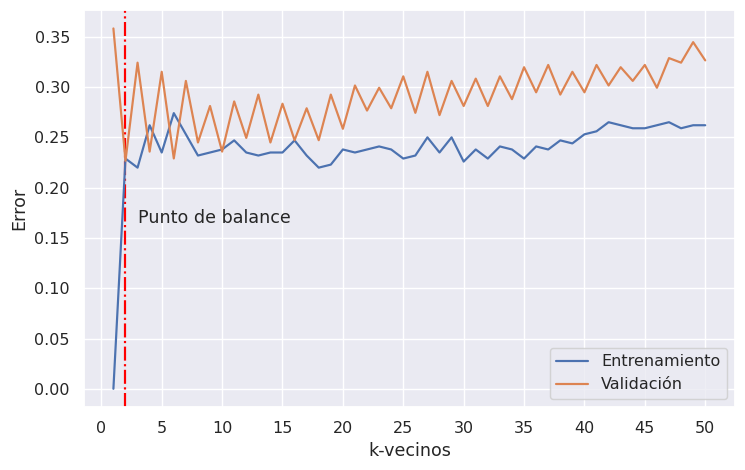

In [231]:
plot_learning_curve(train_error, generalization_error)

In [232]:
pca = PCA() 
transf = pca.fit_transform(X_new_train)

varianza_expl = pca.explained_variance_ratio_

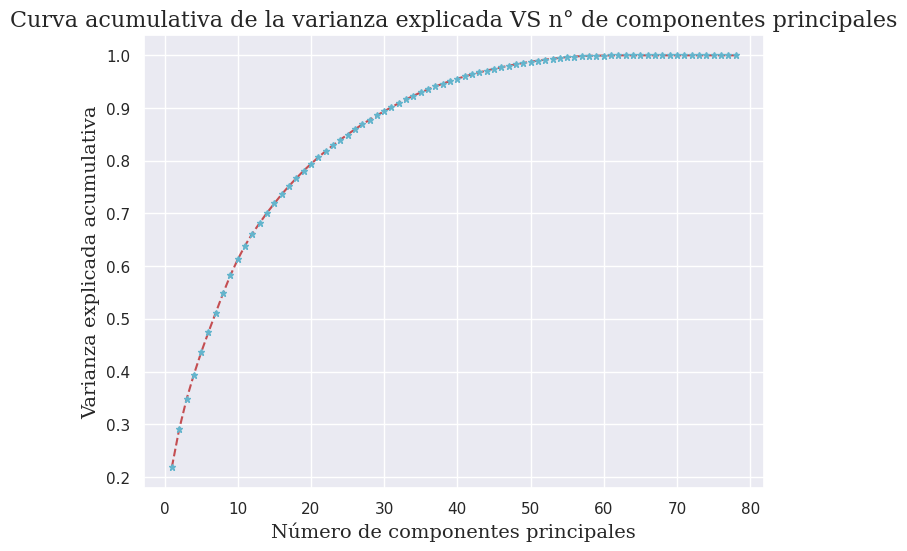

In [233]:
cumulative_explained_variance_plot(varianza_expl)

#### Primero sin PCA

In [234]:
param_grid = {'n_neighbors': [24, 37, 41,47], 
              'weights': ['uniform', 'distance']}

param_grid

{'n_neighbors': [24, 37, 41, 47], 'weights': ['uniform', 'distance']}

In [235]:
grid_knn_sin_pca = GridSearchCV(KNeighborsClassifier(), 
                        param_grid=param_grid, 
                        verbose=1, 
                        n_jobs= -1,
                        cv=5,
                        return_train_score=True
                        )

grid_knn_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [24, 37, 41, 47],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [236]:
print(grid_knn_sin_pca.best_params_)
print(grid_knn_sin_pca.best_score_)

{'n_neighbors': 24, 'weights': 'uniform'}
0.734690185436454


In [237]:
grid_knn_sin_pca.score(X_test, y_test)

0.7210884353741497

In [238]:
y_pred = grid_knn_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho    
                           No Yes
Valor real No             274  96
           Yes             27  44

In [239]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9103    0.7405    0.8167       370
         Yes     0.3143    0.6197    0.4171        71

    accuracy                         0.7211       441
   macro avg     0.6123    0.6801    0.6169       441
weighted avg     0.8143    0.7211    0.7524       441



#### Con PCA

In [240]:
estimators = [
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())]

In [241]:
parameters = {      
    'pca__n_components': [2,20,40,60,78],
    'knn__n_neighbors': [3,6,9],   
    'knn__weights': ['uniform', 'distance']       
}

In [242]:
pipeline = Pipeline(estimators)

In [243]:
grid_knn_con_pca = GridSearchCV(pipeline,   
                           parameters,
                           n_jobs= -1, 
                           cv=5,       
                           verbose=0) # = 3 para más info

In [244]:
grid_knn_con_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 6, 9],
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [2, 20, 40, 60, 78]})

In [245]:
print(f"Mejor score: {grid_knn_con_pca.best_score_}")
print("Mejor configuración de parámetros:")

best_parameters = grid_knn_con_pca.best_params_
for param in sorted(parameters.keys()):
    print(f"\t{param}: {best_parameters[param]}")

Mejor score: 0.6956128448665762
Mejor configuración de parámetros:
	knn__n_neighbors: 9
	knn__weights: uniform
	pca__n_components: 60


In [246]:
y_pred = grid_knn_con_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             269  101
           Yes             23   48

In [247]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9212    0.7270    0.8127       370
         Yes     0.3221    0.6761    0.4364        71

    accuracy                         0.7188       441
   macro avg     0.6217    0.7015    0.6245       441
weighted avg     0.8248    0.7188    0.7521       441



### **Clasificador Naive Bayes**

In [248]:
from sklearn.naive_bayes import GaussianNB

#### Primero sin PCA

In [249]:
naiveB_clf = GaussianNB()
naiveB_clf.fit(X_train, y_train)

GaussianNB()

In [250]:
naiveB_clf.score(X_test, y_test)

0.5918367346938775

In [251]:
y_pred = naiveB_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             202  168
           Yes             12   59

In [252]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9439    0.5459    0.6918       370
         Yes     0.2599    0.8310    0.3960        71

    accuracy                         0.5918       441
   macro avg     0.6019    0.6885    0.5439       441
weighted avg     0.8338    0.5918    0.6442       441



#### Con PCA

In [253]:
estimators = [
    ('pca', PCA()),
    ('knn', GaussianNB())]

In [254]:
parameters = {      
    'pca__n_components': [2,5,10,15,20,25,30,40,60,78],     
}

In [255]:
pipeline = Pipeline(estimators)

In [256]:
grid_naiveB_con_pca = GridSearchCV(pipeline,   
                           parameters, 
                           n_jobs= -1,
                           cv=5,       
                           verbose=0) # = 3 para más info

In [257]:
grid_naiveB_con_pca.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('knn', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 5, 10, 15, 20, 25, 30, 40, 60,
                                               78]})

In [258]:
print(f"Mejor score: {grid_naiveB_con_pca.best_score_}")
print("Mejor configuración de parámetros:")

best_parameters = grid_naiveB_con_pca.best_params_
for param in sorted(parameters.keys()):
    print(f"\t{param}: {best_parameters[param]}")

Mejor score: 0.7528267752148349
Mejor configuración de parámetros:
	pca__n_components: 40


In [259]:
grid_naiveB_con_pca.score(X_test, y_test)

0.63718820861678

In [260]:
y_pred = grid_naiveB_con_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             224  146
           Yes             14   57

In [261]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9412    0.6054    0.7368       370
         Yes     0.2808    0.8028    0.4161        71

    accuracy                         0.6372       441
   macro avg     0.6110    0.7041    0.5765       441
weighted avg     0.8349    0.6372    0.6852       441



### **Random Forest**

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
param_grid = {'n_estimators': [10,25,50,100], 
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2,4,6],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', 'balanced_subsample', None]}

param_grid

{'class_weight': ['balanced', 'balanced_subsample', None],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 25, 50, 100]}

In [264]:
grid_rf_sin_pca = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
                        param_grid=param_grid, 
                        verbose=1, 
                        n_jobs= -1,
                        cv=5,
                        return_train_score=True
                        )

grid_rf_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, verbose=1)

In [265]:
print(grid_rf_sin_pca.best_params_)
print(grid_rf_sin_pca.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 100}
0.7920850293984623


In [266]:
grid_rf_sin_pca.score(X_test, y_test)

0.6984126984126984

In [267]:
y_pred = grid_rf_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             255  115
           Yes             18   53

In [268]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9341    0.6892    0.7932       370
         Yes     0.3155    0.7465    0.4435        71

    accuracy                         0.6984       441
   macro avg     0.6248    0.7178    0.6183       441
weighted avg     0.8345    0.6984    0.7369       441



### **Maquinas de vectores de soporte**

In [269]:
from sklearn.svm import SVC

In [270]:
param_grid = {'C':     [2**i for i in range(-5, 7, 1)], 
              'gamma': [2**i for i in range(-5, 7, 1)],
              'kernel': ['poly','rbf','sigmoid']}

param_grid

{'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
 'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64],
 'kernel': ['poly', 'rbf', 'sigmoid']}

In [271]:
grid_svc_sin_pca = GridSearchCV(SVC(), 
                        param_grid=param_grid, 
                        verbose=1, 
                        n_jobs= -1,
                        cv=5,
                        return_train_score=True
                        )

grid_svc_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32, 64],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32, 64],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [272]:
print(grid_svc_sin_pca.best_params_)
print(grid_svc_sin_pca.best_score_)

{'C': 2, 'gamma': 0.03125, 'kernel': 'sigmoid'}
0.7859791949344188


In [273]:
grid_svc_sin_pca.score(X_test, y_test)

0.7324263038548753

In [274]:
y_pred = grid_svc_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             269  101
           Yes             17   54

In [275]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9406    0.7270    0.8201       370
         Yes     0.3484    0.7606    0.4779        71

    accuracy                         0.7324       441
   macro avg     0.6445    0.7438    0.6490       441
weighted avg     0.8452    0.7324    0.7650       441



### **Redes Neuronales**

In [276]:
from sklearn.neural_network import MLPClassifier

In [277]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (100,50,25), (40,20,10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [10**-i for i in range(0, 6, 1)],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [100, 200, 300, 500, 1000]
}

param_grid

{'activation': ['logistic', 'tanh', 'relu'],
 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
 'hidden_layer_sizes': [(150, 100, 50), (100, 50, 25), (40, 20, 10)],
 'learning_rate': ['constant', 'adaptive'],
 'max_iter': [100, 200, 300, 500, 1000],
 'solver': ['lbfgs', 'sgd', 'adam']}

In [278]:
grid_rn_sin_pca = GridSearchCV(MLPClassifier(max_iter=150), 
                        param_grid=param_grid, 
                        n_jobs= -1,
                        verbose=3, 
                        cv=5,
                        return_train_score=True
                        )

grid_rn_sin_pca.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=150), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(150, 100, 50), (100, 50, 25),
                                                (40, 20, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             return_train_score=True, verbose=3)

In [279]:
print(grid_rn_sin_pca.best_params_)
print(grid_rn_sin_pca.best_score_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}
0.7951605608322025


In [280]:
grid_rn_sin_pca.score(X_test, y_test)

0.7165532879818595

In [281]:
y_pred = grid_rn_sin_pca.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             264  106
           Yes             19   52

In [282]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9329    0.7135    0.8086       370
         Yes     0.3291    0.7324    0.4541        71

    accuracy                         0.7166       441
   macro avg     0.6310    0.7230    0.6314       441
weighted avg     0.8357    0.7166    0.7515       441



# **5. Evaluación Final**

## **Análisis de los resultados**

Revisamos las métricas de todos los modelos para compararlas

Prom - Ponderado = (Acc\*0.2)+(Prec\*0.2)+(Recall\*0.2)+(F1\*0.4)

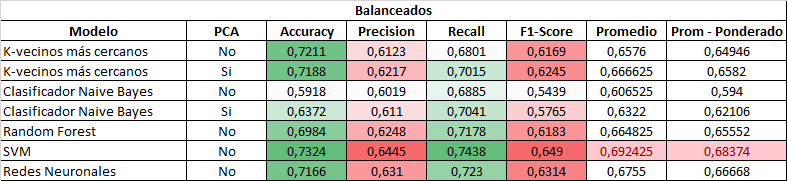

Reconstruimos el mejor modelo

In [285]:
best_model_svc = SVC(C= 2, gamma= 0.03125, kernel= 'sigmoid')

In [286]:
best_model_svc.fit(X_train, y_train)

SVC(C=2, gamma=0.03125, kernel='sigmoid')

In [287]:
best_model_svc.score(X_test, y_test)

0.7324263038548753

In [288]:
y_pred = best_model_svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
list_confusion_matrix(cnf_matrix, ['No', 'Yes'])

Valor predicho     
                           No  Yes
Valor real No             269  101
           Yes             17   54

In [289]:
print(classification_report(y_test,    
                            y_pred,                                
                            target_names=['No', 'Yes'],  
                            digits=4)) 

              precision    recall  f1-score   support

          No     0.9406    0.7270    0.8201       370
         Yes     0.3484    0.7606    0.4779        71

    accuracy                         0.7324       441
   macro avg     0.6445    0.7438    0.6490       441
weighted avg     0.8452    0.7324    0.7650       441



## **Importancia de las caracteristicas**

In [290]:
grid_rf_sin_pca.best_estimator_.feature_importances_

array([0.05224723, 0.02566486, 0.02486844, 0.03367857, 0.07029254,
       0.03478248, 0.02921988, 0.02289987, 0.05119884, 0.01927709,
       0.0420776 , 0.02614955, 0.01935285, 0.04179068, 0.00440999,
       0.0072345 , 0.00415356, 0.00137924, 0.00707458, 0.00606647,
       0.00535346, 0.00542462, 0.00504031, 0.00830962, 0.00101001,
       0.00013705, 0.00679825, 0.00240712, 0.00552758, 0.00312291,
       0.00876128, 0.01404284, 0.00526883, 0.00780686, 0.00503246,
       0.00641504, 0.00255549, 0.0084913 , 0.00764889, 0.00940908,
       0.00509218, 0.0207032 , 0.00580915, 0.0028804 , 0.00650438,
       0.00170845, 0.00547711, 0.00195781, 0.00755448, 0.00347319,
       0.00411707, 0.00472492, 0.00325828, 0.01036919, 0.0069023 ,
       0.01153558, 0.00393903, 0.00492163, 0.0099425 , 0.00422137,
       0.00488145, 0.00648078, 0.06324915, 0.08201481, 0.00313622,
       0.00291537, 0.00390615, 0.0027849 , 0.00446388, 0.00555032,
       0.01209072, 0.01183916, 0.00249778, 0.00477388, 0.00650

In [291]:
np.array(X_full_train_df.columns)

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'Gender_Female', 'Gender_Male',
       'JobInvolvement_1', 'JobInvolvement_2', 'Jo

In [292]:
df_importancias = pd.DataFrame(data=list(zip(np.array(X_full_train_df.columns),grid_rf_sin_pca.best_estimator_.feature_importances_)), columns=['columna', 'importancia'])
df_importancias = df_importancias.sort_values('importancia', ascending=False)

In [293]:
df_importancias

,columna,importancia
63,OverTime_Yes,0.082015
4,MonthlyIncome,0.070293
62,OverTime_No,0.063249
0,Age,0.052247
8,TotalWorkingYears,0.051199
...,...,...
47,JobRole_Human Resources,0.001958
45,JobLevel_5,0.001708
17,Department_Human Resources,0.001379
24,Education_5,0.001010


In [297]:
px.bar(df_importancias, x = 'columna', y = 'importancia')

Más detalles sobre Importancia de las caracteristicas en las imágenes adjuntas. (No se ponen en el notebook, debido a que son muy grandes y no se puede visualizar cómodamente)